<a href="https://www.princetonalumniangels.org/" target = "_blank"><img src="paa_logo.png" width="240" height="240" align="right"/></a>

This is a simple data analysis of startups that have applied to Princeton Alumni Angels. The goal of this analysis is to get a rough understanding of where PAA is standing in terms of its goal to invest in "world class startups that have diverse leadership".

Data sets are currently kept private to Princeton Alumni Angels, but that may change in the future. If you do anything with the code, please credit us!

Contact: Leon Chen '23 (leonchen@princeton.edu), Asher Joy '23 (asherj@princeton.edu)

**At the top of the page, notice that there is a toggle named "hide code". If you would like to hide the code that we used to produce the graphs, just hit that button.**

## Important stuff needed to code

In [47]:
#!pip install matplotlib --upgrade
#!pip3 install pandas
#!pip3 install matplotlib
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt

## Read our data in

In [48]:
df_data = pd.read_csv("PAA_Data - FINAL.csv")

## Clean our data so we are left with relevant columns

In [49]:
#Remove last 2 rows (these rows were used for excel sums)
df_data.drop([len(df_data.index) - 1, len(df_data.index) - 2], inplace = True)

#Make these column names a little bit more legible
df_data.rename(columns={"Industry Served": "Industry", "Amount Already Closed of the Total Currently Raising": \
                        "Already Closed", "[Gender] Does anyone on your founding team identify as:" : "Gender", \
                        "[Race/Ethnicity] Does anyone on your founding team identify as:": "Race/Ethnicity", 
                        "Has anyone on your founding team ever served on active duty?": "Active Duty",
                        "Does anyone on your founding team identify as (select all that apply):.1" : "Race/Ethnicity"},
                        inplace = True)

#These are columns with binary entries we initially separated from their parent columns due to the form
#filled out by startups applying to PAA. Although these columns are helpful in excel/airtable, for filtering,
#visualizations and counts of everything, these aren't really necessary.
df_data.drop(columns={"Princeton Connection", "Female? (Binary)", "Male? (Binary)", "White? (Binary)", "Hispanic/Latinx? (Binary)",
                 "African-American/Black? (Binary)", "East Asian? (Binary)", "South Asian? (Binary)", "Timestamp",
              "American Indian/Alaskan Native", "Pacific Islander", "Middle Eastern", "Commit to send a founder or C-level executive to deliver the pitch."}, inplace = True)

In [50]:
#Replace nans
df_data["Gender"] = df_data["Gender"].fillna("")
df_data["Race/Ethnicity"] = df_data["Race/Ethnicity"].fillna("")
df_data["Active Duty"] = df_data["Active Duty"].fillna("")
df_data["State Registered"] = df_data["State Registered"].fillna("")
df_data["State Headquartered"] = df_data["State Headquartered"].fillna("")
df_data["Annual Cash Revenue (USD)"] = df_data["Annual Cash Revenue (USD)"].fillna("")
df_data["What Type of Entity Has Invested?"] = df_data["What Type of Entity Has Invested?"].fillna("")
df_data["Form of Current Investment"] = df_data["Form of Current Investment"].fillna("")
df_data["How did you hear about Princeton Alumni Angels?"] = df_data["How did you hear about Princeton Alumni Angels?"].fillna("")

df_data["Total Amount Currently Raising"] = df_data["Total Amount Currently Raising"].fillna(0)
df_data["Already Closed"] = df_data["Already Closed"].fillna(0)
df_data["Total Full Time Equivalents"] = df_data["Total Full Time Equivalents"].fillna(0)
df_data["Total number of NON-full time employees"] = df_data["Total number of NON-full time employees"].fillna(0)
df_data["Minimum investment amount per investor?"] = df_data["Minimum investment amount per investor?"].fillna(0)
df_data["Number of current customers"] = df_data["Number of current customers"].fillna(0)

In [51]:
#The pitch application groups important categories together if there are multiple
#founders/co-founders. Let's clean the groups up into lists.
genders_list = []
for i in range(len(df_data["Gender"])): 
    genders = df_data["Gender"].iloc[i]
    genders = genders.split(',')
    # for each gender in the list, strip white spaces and add to new array
    array = []
    for ge in genders:
        ge = ge.strip()
        array.append(ge)
    genders_list.append(array) 
# replace "gender" column with cleaned list
df_data["Gender"] = genders_list

#Now for race/ethnicity
re_list = []
for i in range(len(df_data["Race/Ethnicity"])): 
    re = df_data["Race/Ethnicity"].iloc[i]
    re = re.split(',')
    # for each race/ethnicity in the list, strip white spaces and add to new array
    array = []
    for r in re:
        r = r.strip()
        array.append(r)
    re_list.append(array) 
# replace "race/ethnicity" column with cleaned list
df_data["Race/Ethnicity"] = re_list

## Visualizations

**Let's start with an analysis on the size of startups applying to PAA based on capital**

In [52]:
#Let's threshold this. We don't necessarily want to see the few outlier startups
#that are trying to raise >$10000000 USD
million = 1000000
threshold_raising = 10000000

#Only want companies/values that are raising below $10000000 USD
#which is still pretty large
currently_raising = [i/million for i in df_data["Total Amount Currently Raising"].copy() if i < threshold_raising]

#Now for already closed
#Reasonable to assume $5000000 USD treshold for amount
#already closed for startups considering PAA
threshold_closed = 5000000
already_closed = [i/million for i in df_data["Already Closed"].copy() if i < threshold_closed]

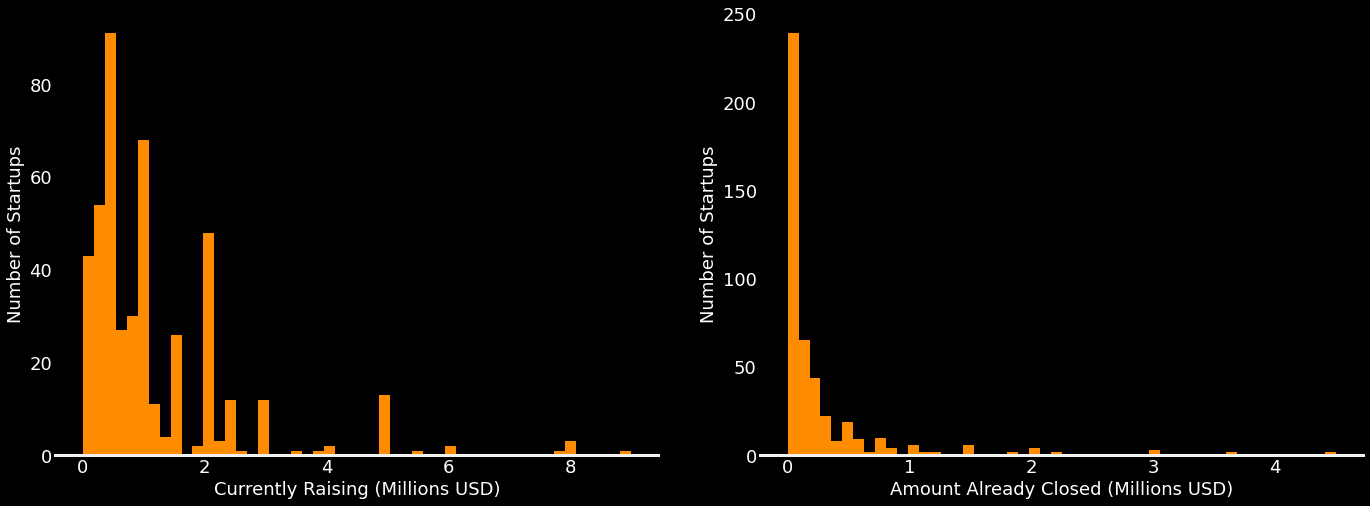

In [53]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (20,8))
fig.patch.set_facecolor("black")
plt.style.use("fivethirtyeight")
ax1.hist(currently_raising, color = "darkorange", bins = 50)
ax1.set_facecolor("black")
ax1.set_xlabel('Currently Raising (Millions USD)', fontsize = 18, color = "white")
ax1.set_ylabel('Number of Startups', fontsize = 18, color = "white")
ax1.tick_params(axis = "both", colors = "white", labelsize = 18)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['left'].set_visible(False)
ax1.grid(False)

fig.patch.set_facecolor("black")
ax2.hist(already_closed, color = "darkorange", bins = 50)
ax2.set_facecolor("black")
ax2.set_xlabel('Amount Already Closed (Millions USD)', fontsize = 18, color = "White")
ax2.set_ylabel('Number of Startups', fontsize = 18, color = "White")
ax2.tick_params(axis = "both", colors = "White", labelsize = 18)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax2.grid(False)

plt.tight_layout(pad = 3)
plt.show()

**Now let's move on to gender analysis**

In [54]:
#Check when gender data first appears in dataframe - since we know this never
#appears in 2018-2019, just check for the first instance it appears
first_gender=0
for i in range(len(df_data["Gender"])):
  if all('' == value for value in df_data["Gender"].iloc[i]):
    pass
  else:  
    first_gender = i
    break

#Next, there might be white space (e.g. no response) even when the
#gender section was active. Let's rename this to "no response".
for i in range(first_gender, len(df_data["Gender"])):
  if '' in df_data["Gender"].iloc[i]:
    df_data["Gender"].iloc[i] = ["No Response"]

#Looks like there are none!

#We now want to find unique instances of genders! We can do this by using
#a counter
copy = df_data["Gender"].iloc[first_gender:].copy()
values = copy.values
c = Counter()
for vals in values:
    for x in vals:
      #for each unique appearance, +1 count
        c[x] += 1

categories_gender = []
vals_gender = []
for i in c:
    categories_gender.append(i)
    vals_gender.append(c[i])

#Let's sort them to make our chart a bit more pleasant to look at
sorted_in = np.argsort(vals_gender)

vals_gender1 = []
categories_gender1 = []

for i in range(len(sorted_in)):
  vals_gender1.append(vals_gender[sorted_in[i]])
  categories_gender1.append(categories_gender[sorted_in[i]])


#Let's do percentages now!
percentages_gender = []
pie_categories = []

for i in range(len(vals_gender1)):
  blank = []
  blank1 = []
  percent = vals_gender1[i] / (len(df_data["Gender"]) - first_gender - 1)
  blank.append(percent)
  blank.append(1 - percent)
  blank1.append( categories_gender1[i] + "\n  "+ str(round(percent * 100, 1)) + "%")
  blank1.append("")
  percentages_gender.append(blank)
  pie_categories.append(blank1)

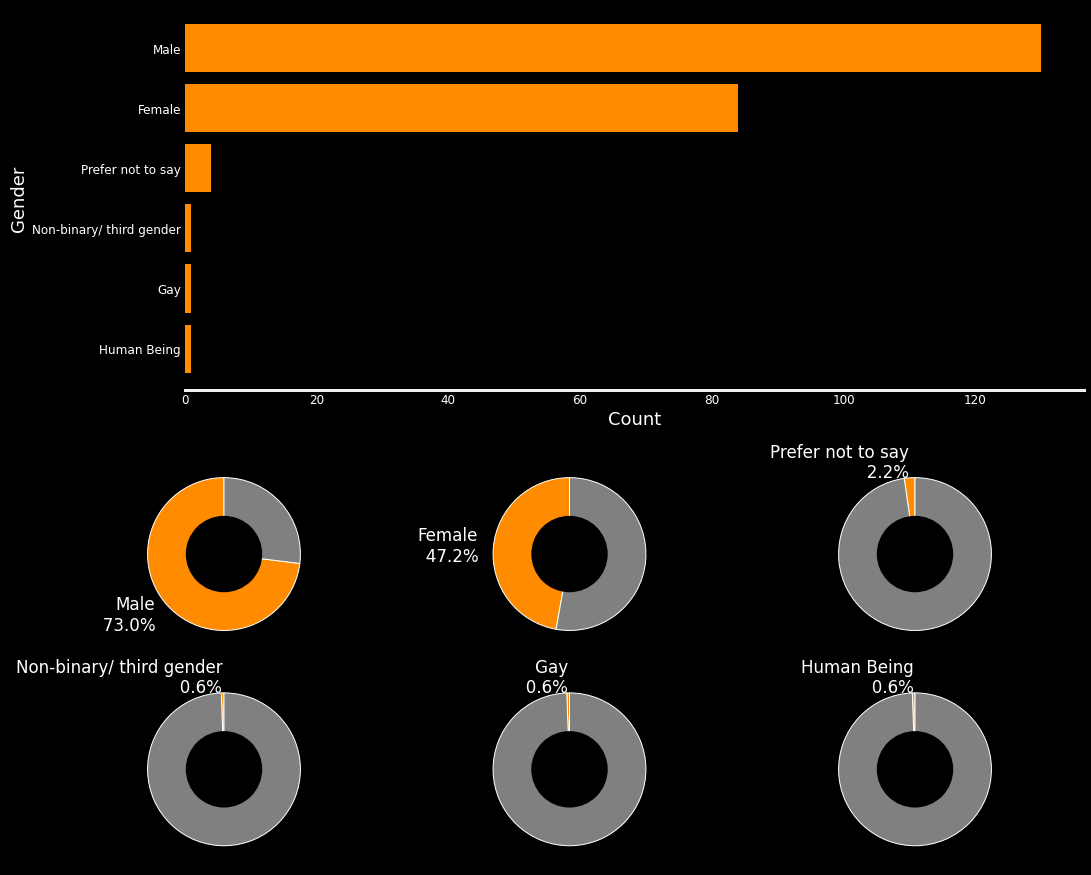

In [55]:
fig = plt.figure(constrained_layout=True, figsize=(15, 12))
fig.patch.set_facecolor("black")

subfigs = fig.subfigures(2, 1, wspace=0.07)
subfigs[0].set_facecolor("black")
ax1 = subfigs[0].subplots(1, 1)
ax1.set_facecolor("black")
ax1.barh(categories_gender1,vals_gender1, color = "darkorange")
ax1.set_xlabel('Count', fontsize = 18, color = "white")
ax1.set_ylabel('Gender', fontsize = 18, color = "white")
ax1.tick_params(axis = "both", colors = "white", labelsize = 12)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['left'].set_visible(False)
ax1.grid(False)


subfigs[1].set_facecolor("black")
ax2 = subfigs[1].subplots(2, 3)
ax2 = ax2.ravel()

j = 5
colors = ["darkorange", "grey"]

data = {}
for i in range(6):
  data['circle%d' % i] = i

for i in range(6):
  patches, texts = ax2[i].pie(percentages_gender[j], labels = pie_categories[j], colors = colors, 
             startangle = 90, textprops={'size': 'large'}, wedgeprops={'edgecolor' : 'white', 
            'linewidth' : '1.0'}, labeldistance = 1.2)
  
  data[i] = plt.Circle((0, 0), 0.5, fc = 'black')
  ax2[i].add_patch(data[i])

  for i, patch in enumerate(patches):
    texts[i].set_color("white")

  #axs[i].axis('equal')
  j-=1
   
plt.show()

**Now let's do Race/Ethnicity**

In [56]:
#Now for Race/Ethnicity
first_re = first_gender

#Once again, there could be white space!
for i in range(first_gender, len(df_data["Race/Ethnicity"])):
  if '' in df_data["Race/Ethnicity"].iloc[i]:
    df_data["Race/Ethnicity"].iloc[i] = ["No Response"]


for i in range(first_gender, len(df_data["Race/Ethnicity"])):
    for string in df_data["Race/Ethnicity"].iloc[i]:
        if "Asian" in string:
            index = df_data["Race/Ethnicity"].iloc[i].index(string)
            df_data["Race/Ethnicity"].iloc[i][index] = "Asian"

copy = df_data["Race/Ethnicity"].iloc[first_re:].copy()
values = copy.values
c = Counter()
for vals in values:
    for x in vals:
        c[x] += 1
  
#Let's see the counter and the most common; since there are a lot of choices
#as evident from the excel file, it may be smart to group into an "other" category

#We can see that there are a LOT of small numbers here: let's choose the value of
#10 to threshold (we can see that there are many below 10)

for i in c:
  if c[i] < 10:
    c["Other"] += c[i]

categories_re = []
vals_re = []
for i in c:
  if c[i] >= 10:
    categories_re.append(i)
    vals_re.append(c[i])

#Let's sort to make it prettier
sorted_in = np.argsort(vals_re)

vals_re1 = []
categories_re1 = []
for i in range(len(sorted_in)):
  vals_re1.append(vals_re[sorted_in[i]])
  categories_re1.append(categories_re[sorted_in[i]])

#now for percentages!

percentages_re = []
pie_re = []

for i in range(len(vals_re1)):
  blank = []
  blank1 = []
  percent = vals_re1[i] / (len(df_data["Race/Ethnicity"]) - first_re - 1)
  blank.append(percent)
  blank.append(1 - percent)
  blank1.append( categories_re1[i] + "\n  "+ str(round(percent * 100, 1)) + "%")
  blank1.append("")
  percentages_re.append(blank)
  pie_re.append(blank1)

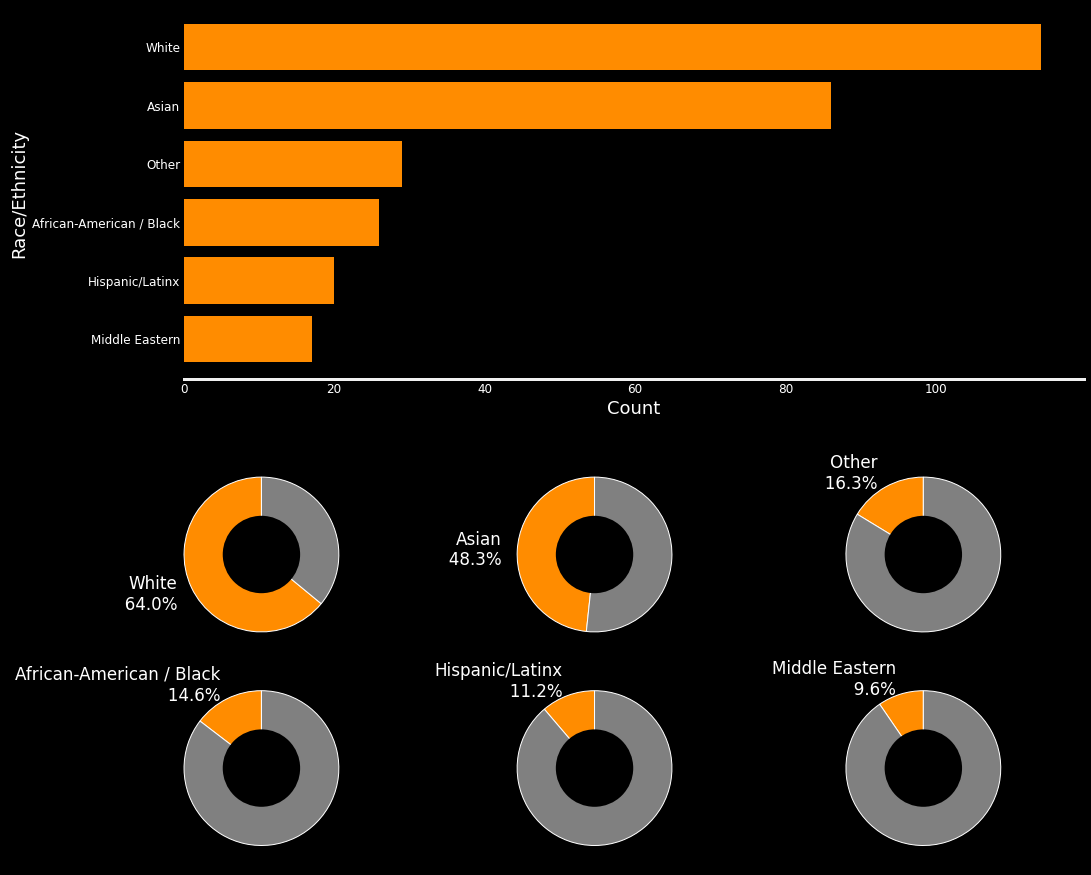

In [57]:
fig = plt.figure(constrained_layout=True, figsize = (15, 12))
fig.patch.set_facecolor("black")

subfigs = fig.subfigures(2, 1, hspace = 0.07)
subfigs[0].set_facecolor("black")

ax2 = subfigs[0].subplots(1, 1)
ax2.set_facecolor("black")
ax2.barh(categories_re1,vals_re1, color = "darkorange")
ax2.set_xlabel('Count', fontsize = 18, color = "white")
ax2.set_ylabel('Race/Ethnicity', fontsize = 18, color= "white")
ax2.tick_params(axis = "both", labelsize = 12, colors = "white")
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax2.grid(False)


subfigs[1].set_facecolor("black")
axs = subfigs[1].subplots(2, 3)
axs = axs.ravel()

j = 5
colors = ["darkorange", "grey"]

data = {}
for i in range(len(categories_re1)):
  data['circle%d' % i] = i

for i in range(len(categories_re1)):
  patches, texts = axs[i].pie(percentages_re[j], labels = pie_re[j], colors = colors, 
             startangle = 90, textprops={'size': 'large'}, wedgeprops={'edgecolor' : 'white', 
            'linewidth' : '1.0'}, labeldistance = 1.2)
  
  data[i] = plt.Circle((0, 0), 0.5, fc = 'black')
  axs[i].add_patch(data[i])

  for i, patch in enumerate(patches):
    texts[i].set_color("white")

  #axs[i].axis('equal')
  j-=1

plt.show()

**Registration and headquarter locations...registration not too important**

In [58]:
#Let's do the same thing for registration locations!

copy = df_data["State Registered"].copy()
values = copy.values
c = Counter()
for val in values:
  c[val] += 1

#print(c)
#Do we really care about the blanks in our graph?

categories_sr = []
vals_sr = []
for i in c:
  if c[i] >= 5 and i != "":
    categories_sr.append(i)
    vals_sr.append(c[i])

#Let's sort to make it prettier
sorted_in = np.argsort(vals_sr)

vals_sr1 = []
categories_sr1 = []
for i in range(len(sorted_in)):
  vals_sr1.append(vals_sr[sorted_in[i]])
  categories_sr1.append(categories_sr[sorted_in[i]])

In [59]:
#States headquartered
copy = df_data["State Headquartered"].copy()
values = copy.values
c = Counter()
for vals in values:
  c[vals] += 1

categories_sh = []
vals_sh = []
for i in c:
  if c[i] > 9 and i != "":
    categories_sh.append(i)
    vals_sh.append(c[i])

sorted_in = np.argsort(vals_sh)
categories_sh1 = []
vals_sh1 = []

for i in range(len(sorted_in)):
  vals_sh1.append(vals_sh[sorted_in[i]])
  categories_sh1.append(categories_sh[sorted_in[i]])

#now for percentages
percentages_sh = []
pie_sh = []
sum = 0

for i in range(len(vals_sh1)):
  percent = vals_sh1[i] / (len(df_data["State Headquartered"]))# - c[''])
  sum += percent
  percentages_sh.append(percent)
  pie_sh.append(categories_sh1[i])

percentages_sh.append(1 - sum)
pie_sh.append("Other")

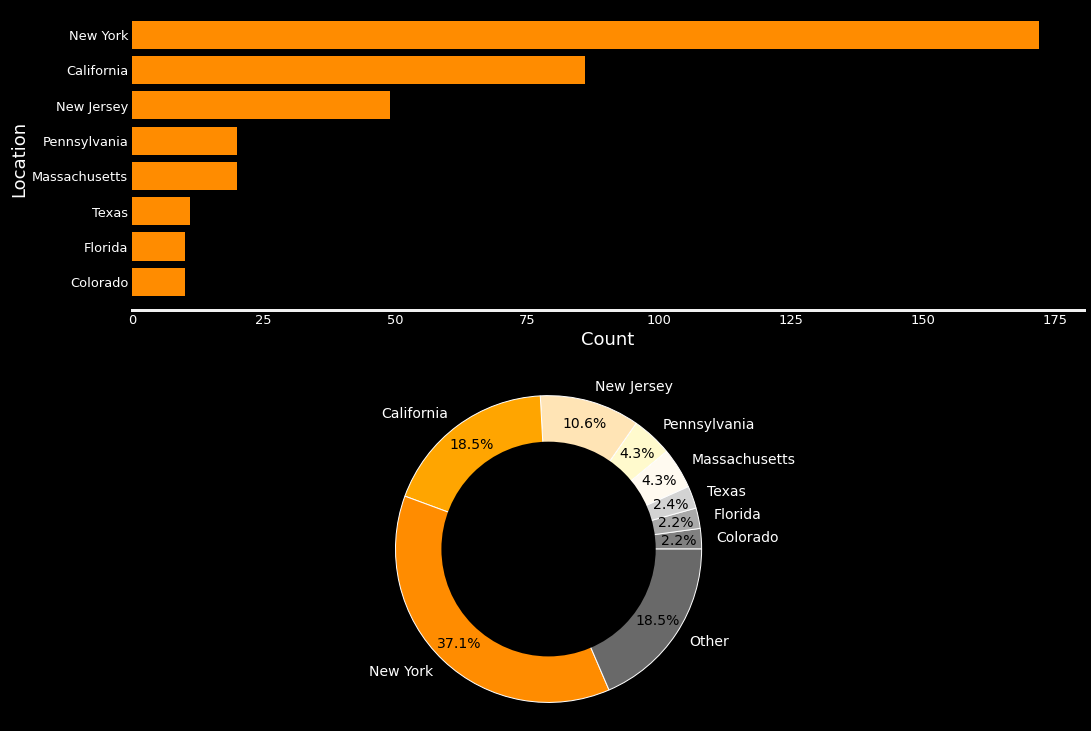

In [60]:
fig = plt.figure(constrained_layout = True, figsize = (15, 10))
fig.patch.set_facecolor("black")

subfigs = fig.subfigures(2, 1, hspace = 0.07)
subfigs[0].set_facecolor("black")

ax = subfigs[0].subplots(1, 1)
ax.set_facecolor("black")
ax.barh(categories_sh1,vals_sh1, color = "darkorange")
ax.set_xlabel('Count', fontsize = 18, color = "white")
ax.set_ylabel('Location', fontsize = 18, color= "white")
ax.tick_params(axis = "both", labelsize = 13, colors = "white")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.grid(False)


subfigs[1].set_facecolor("black")
axs = subfigs[1].subplots(1, 1)

colors = ["grey", "darkgrey", "lightgrey", "floralwhite", "lemonchiffon", "moccasin",
          "orange", "darkorange", "dimgrey"]
#explode = [0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, .05]   
patches, texts, pct = axs.pie(percentages_sh, labels = pie_sh, colors = colors, 
            textprops={'size': 'medium'}, wedgeprops={'edgecolor' : 'white', 
            'linewidth' : '1.0'}, autopct = '%1.1f%%', pctdistance = 0.85)#, explode = explode)

for i, patch in enumerate(patches):
  texts[i].set_color('white')
data = plt.Circle((0, 0), 0.7, fc = 'black')
axs.add_patch(data)
axs.axis('equal')


plt.show()

In [61]:
%%html
<iframe title="" aria-label="Map" id="datawrapper-chart-BDaMr" src="https://datawrapper.dwcdn.net/BDaMr/1/" scrolling="no" frameborder="0" style="width: 0; min-width: 100% !important; border: none;" height="549"></iframe><script type="text/javascript">!function(){"use strict";window.addEventListener("message",(function(e){if(void 0!==e.data["datawrapper-height"]){var t=document.querySelectorAll("iframe");for(var a in e.data["datawrapper-height"])for(var r=0;r<t.length;r++){if(t[r].contentWindow===e.source)t[r].style.height=e.data["datawrapper-height"][a]+"px"}}}))}();
</script>